## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_drug_results=pd.merge(mouse_metadata,study_results, on="Mouse ID" )

# Display the data table for preview
combined_drug_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = combined_drug_results["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_drug_results.loc[combined_drug_results.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id = pd.DataFrame(duplicate_mice)
duplicate_mice_id

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_drug_results[combined_drug_results['Mouse ID'].isin(duplicate_mice)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean=clean_df['Mouse ID'].value_counts()
clean_number_mice= len(clean)
clean_number_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_mean

regimen_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_median

regimen_variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_variance

regimen_std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
regimen_sem

single_stat_table = pd.DataFrame({
    "Mean":regimen_mean,
    "Median":regimen_median,
    "Variance":regimen_variance,
    "Standard Deviation":regimen_std,
    "SEM":regimen_sem})

single_stat_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_group_by = clean_df.groupby('Drug Regimen')

summary_stats_line = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

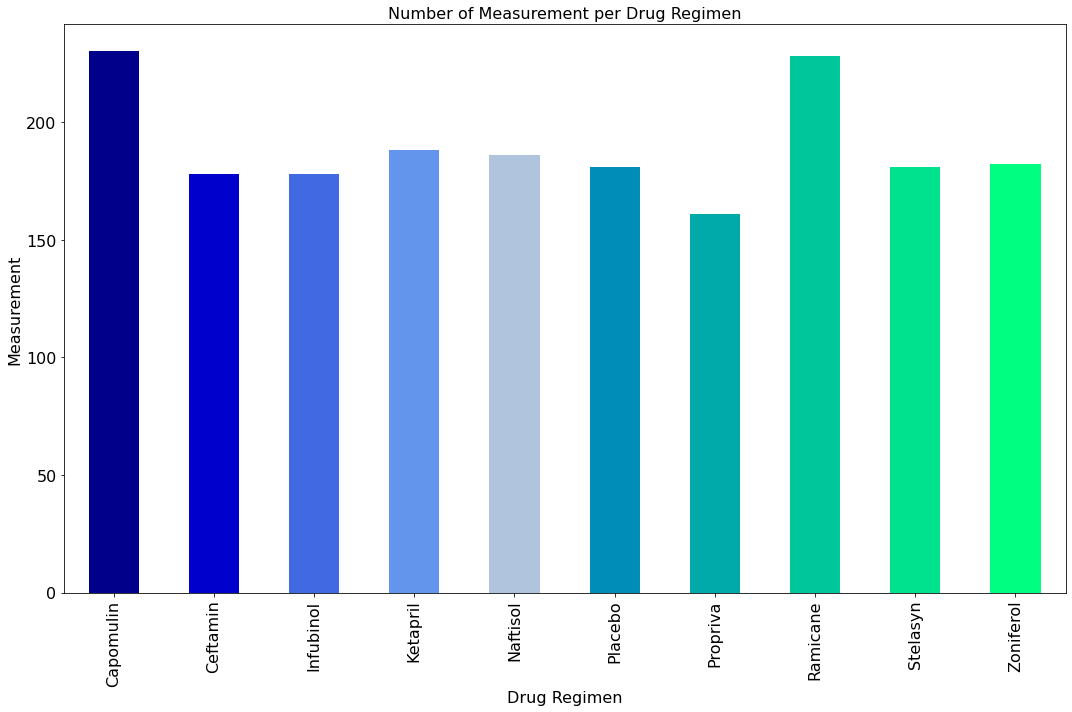

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

mice_per_treatment = combined_drug_results.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]

treatment_plot = mice_per_treatment.plot.bar(figsize=(15,10), color=['darkblue','mediumblue','royalblue','cornflowerblue','lightsteelblue','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80'], fontsize = 16)

plt.xlabel("Drug Regimen", fontsize = 16)
plt.ylabel("Measurement", fontsize = 16)
plt.title("Number of Measurement per Drug Regimen", fontsize = 16)
plt.tight_layout()

mice_per_treatment

Text(0, 0.5, 'Measurements')

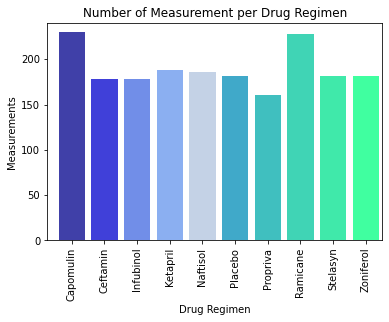

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measurement= [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis =np.arange(len(mice_per_treatment))

plt.bar(x_axis, measurement, color=['darkblue','mediumblue','royalblue','cornflowerblue','lightsteelblue','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80'], alpha=0.75, align="center")

tick_drug_regimen= [value for value in x_axis]
plt.xticks(tick_drug_regimen, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn","Zoniferol"], rotation= "vertical")

plt.xlim(-0.75, len(x_axis)-0.50)
plt.ylim(0, max(measurement)+10)
plt.title("Number of Measurement per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")

In [11]:
#Determine female and male count
groupby_gender = mouse_metadata.groupby(["Mouse ID", "Sex"])
groupby_gender

mouse_gender_df= pd.DataFrame(groupby_gender.size())

# Total Count of female and male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#Determine percentage of female and male mice
mouse_gender["Percentage of Sex"]= (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender["Percentage of Sex"]= mouse_gender["Percentage of Sex"]

mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


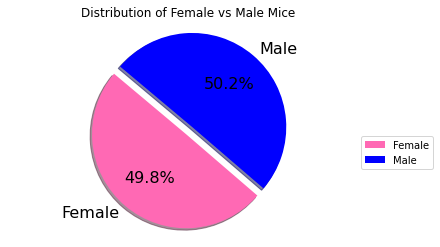

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors=['Hotpink','Blue']
explode=(0.1, 0)
pie_1 = mouse_gender.plot.pie(y="Total Count", colors= colors, startangle= 140, explode = explode,
                            shadow= True, fontsize = 16, autopct="%1.1f%%")
pie_1.set_title("Distribution of Female vs Male Mice")
plt.axis("equal")
pie_1.set_ylabel(" ")
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.show()


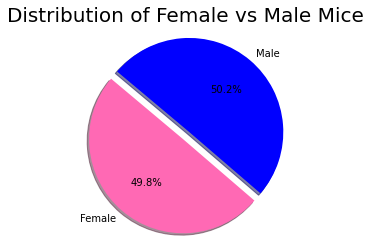

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels= ["Female", "Male"]
sizes = [49.799197,50.200803]
colors=['Hotpink','Blue']
explode=(0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribution of Female vs Male Mice", fontsize=20)
plt.axis("equal")
plt.rcParams['figure.figsize']=(5,5)
plt.rcParams['font.size']=(16)

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capomulin_df=combined_drug_results.loc[combined_drug_results["Drug Regimen"]== "Capomulin"]
ramicane_df=combined_drug_results.loc[combined_drug_results["Drug Regimen"]== "Ramicane"]
infubinol_df=combined_drug_results.loc[combined_drug_results["Drug Regimen"]== "Infubinol"]
ceftamin_df=combined_drug_results.loc[combined_drug_results["Drug Regimen"]== "Ceftamin"]


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Capomulin

capomulin_last = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, combined_drug_results, on= ("Mouse ID", "Timepoint"))
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [17]:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds

capomulin_tumors_vol = capomulin_merge["Tumor Volume (mm3)"]

capomulin_quartiles =capomulin_tumors_vol.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq


print(f"The lower quartile of Capomulin tumors: {round(capomulin_lowerq,2)}")
print(f"The upper quartile of Capomulin tumors: {round(capomulin_upperq,2)}")
print(f"The interquartile range of Capomulin tumors: {round(capomulin_iqr,2)}")
print(f"The median of Capomulin tumors: {round(capomulin_quartiles[0.5],2)} ")

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

print(f"Values below {round(capomulin_lower_bound,2)} could be outliers.")
print(f"Values above {round(capomulin_upper_bound,2)} could be outliers.")

The lower quartile of Capomulin tumors: 32.38
The upper quartile of Capomulin tumors: 40.16
The interquartile range of Capomulin tumors: 7.78
The median of Capomulin tumors: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.


In [18]:
# Ramicane

ramicane_last = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, combined_drug_results, on= ("Mouse ID", "Timepoint"))
ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [19]:
# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds

ramicane_tumors_vol = ramicane_merge["Tumor Volume (mm3)"]

ramicane_quartiles =ramicane_tumors_vol.quantile([.25,.5,.75])
ramicane_lowerq =ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq


print(f"The lower quartile of Ramicane tumors: {round(ramicane_lowerq,2)}")
print(f"The upper quartile of Ramicane tumors: {round(ramicane_upperq,2)}")
print(f"The interquartile range of Ramicane tumors: {round(ramicane_iqr,2)}")
print(f"The median of Ramicane tumors: {round(ramicane_quartiles[0.5],2)} ")

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

print(f"Values below {round(ramicane_lower_bound,2)} could be outliers.")
print(f"Values above {round(ramicane_upper_bound,2)} could be outliers.")

The lower quartile of Ramicane tumors: 31.56
The upper quartile of Ramicane tumors: 40.66
The interquartile range of Ramicane tumors: 9.1
The median of Ramicane tumors: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [20]:
#  Infubinol

infubinol_last = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, combined_drug_results, on= ("Mouse ID", "Timepoint"))
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [27]:
# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds

infubinol_tumors_vol = infubinol_merge["Tumor Volume (mm3)"]

infubinol_quartiles =infubinol_tumors_vol.quantile([.25,.5,.75])
infubinol_lowerq =infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq


print(f"The lower quartile of Infubinol tumors: {round(infubinol_lowerq,2)}")
print(f"The upper quartile of Infubinol tumors: {round(infubinol_upperq,2)}")
print(f"The interquartile range of Infubinol tumors: {round(infubinol_iqr,2)}")
print(f"The median of Infubinol tumors: {round(infubinol_quartiles[0.5],2)} ")

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

print(f"Values below {round(infubinol_lower_bound,2)} could be outliers.")
print(f"Values above {round(infubinol_upper_bound,2)} could be outliers.")

The lower quartile of Infubinol tumors: 54.05
The upper quartile of Infubinol tumors: 65.53
The interquartile range of Infubinol tumors: 11.48
The median of Infubinol tumors: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


In [28]:
#  Ceftamin

ceftamin_last = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, combined_drug_results, on= ("Mouse ID", "Timepoint"))
ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [31]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

ceftamin_tumors_vol = ceftamin_merge["Tumor Volume (mm3)"]

ceftamin_quartiles =ceftamin_tumors_vol.quantile([.25,.5,.75])
ceftamin_lowerq =ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq


print(f"The lower quartile of Ceftamin tumors: {round(ceftamin_lowerq,2)}")
print(f"The upper quartile of Ceftamin tumors: {round(ceftamin_upperq,2)}")
print(f"The interquartile range of Ceftamin tumors: {round(ceftamin_iqr,2)}")
print(f"The median of Ceftaminl tumors: {round(ceftamin_quartiles[0.5],2)} ")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

print(f"Values below {round(ceftamin_lower_bound,2)} could be outliers.")
print(f"Values above {round(ceftamin_upper_bound,2)} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72
The upper quartile of Ceftamin tumors: 64.3
The interquartile range of Ceftamin tumors: 15.58
The median of Ceftaminl tumors: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

capomulin_tumors_vol = capomulin_merge["Tumor Volume (mm3)"]
ramicane_tumors_vol = ramicane_merge["Tumor Volume (mm3)"]
infubinol_tumors_vol = infubinol_merge["Tumor Volume (mm3)"]
ceftamin_tumors_vol = ceftamin_merge["Tumor Volume (mm3)"]

#Combining final 4 tumor volumes:
volumns = [capomulin_tumors_vol, ramicane_tumors_vol, infubinol_tumors_vol, ceftamin_tumors_vol]

# Outliers plot of final 4 tumor volumes

fig1, ax1 = plt.subplots(1, figsize=(9, 6))
ax1.set_title('Final Tumor Volume of Top 4 Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen', fontsize=14)
regimen_labels=["Capomulin","Ramicane","Infubinol","Ceftamin"]
ax1.boxplot(volumns, labels=regimen_labels, patch_artist=True)

for flier in ax1['fliers']:
    flier.set(marker='o', markerfacecolor='r, alpha=1)

plt.savefig('boxplot')
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-41-19e4fd314344>, line 20)

## Line and Scatter Plots

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
